Вывод формулы для условного математического ожидания:
$E(N_t|N_s) = E(N_t - N_s + N_s|N_s) = E(N_t - N_s) + E(N_s|N_s) = E(N_t|N_s) + N_s = \lambda*(t - s) + N_s$


Nuber of broken servers for all time - 500.0 sec:  1000


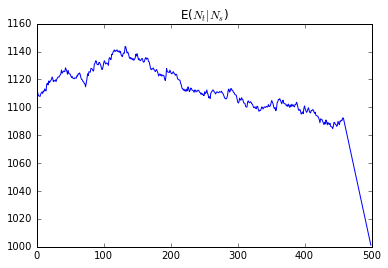

Program results: 
0   1112.888888888889
100   1111.6666666666667
200   1109.4444444444446
300   1108.2222222222222
400   1108.0
500   1107.7777777777778
600   1109.5555555555557
700   1110.3333333333335
800   1111.111111111111
900   1109.888888888889
1000   1111.6666666666667
1100   1111.4444444444446
1200   1113.2222222222222
1300   1112.0
1400   1111.7777777777778
1500   1116.5555555555557
1600   1117.3333333333335
1700   1116.111111111111
1800   1118.888888888889
1900   1117.6666666666667
2000   1118.4444444444446
2100   1119.2222222222222
2200   1120.0
2300   1121.7777777777778
2400   1120.5555555555557
2500   1118.3333333333335
2600   1119.111111111111
2700   1118.888888888889
2800   1119.6666666666667
2900   1118.4444444444446
3000   1120.2222222222222
3100   1121.0
3200   1121.7777777777778
3300   1121.5555555555557
3400   1122.3333333333335
3500   1123.111111111111
3600   1123.888888888889
3700   1126.6666666666667
3800   1124.4444444444446
3900   1125.2222222222222
4000   1126

In [36]:
import numpy as nmp
import scipy as scp
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline 

_lambda = 1/45 # ~pois(1/lambda(t-s))
t_0 = 100 # с такой периодичностью выводятся уточненные данные (в секундах)
t = 50000 # рассматриваем до этого момента

file = open('6.csv', 'r') # файл немного изменен(прикреплен) - удалены первые три строчки (_lambda, t_0, t)
data = []

# считываем данные из файла
for line in file:
    for value in line.split():
        data.append(float(value))

N_t = len(data) # всего серверов 1000
print("Nuber of broken servers for all time -", t / t_0,"sec: ", N_t)

i = 0
_id = 0
N_s = 0
result = [] #чтобы не просто вывести данные, но и построить график

# s - время, N_s - количество сломанных серверов
while (i < t):
    if (_id == 999):
        # если нужно выводить значения во время работы программы - 
        # заменить на print(_lambda * (t - i) + count) (внизу аналогично)
        result.append(_lambda * (t - i) + N_s)
        i = i + t_0
    else:
        i = i + t_0
        while(data[_id] < i):
            N_s = N_s + 1
            _id = _id + 1
        result.append(_lambda * (t - i) + N_s)

axis_x = nmp.arange(0, len(result), 1)
plt.plot(axis_x, result)
plt.title("E($N_t|N_s$)")
plt.show()

# вывод результатов: первый столбец - время, второй - мат.ожидание
print("Program results: ")
for i in range(len(result)):
    print(i * t_0, ' ', result[i])